# Домашнее задание №1: Введение в HPC

**Выполнил:** Дмитрий Клебанов, ML-32

**Задание:**

1. Написать эссе (1-2 страницы) по применениям суперкомпьютеров в науке, индустрии и бизнесе. Можно выбрать интересный пример из интернета и описать. Опишите также как, на ваш взгляд, применение суперкомпьютеров и параллельных вычислений пригодится вам в карьере.
2. Используя данные с сайта top500.org (statistics/performance development) попробуйте предсказать вычислительную мощность компьютера #1 и компьютера #500. (численное значение - 50 процентов от задания, численное значение + график - 100 процентов от задания)

**Часть 1**

### Геологоразведка

Современная вычислительная техника позволяет находить труднодоступную нефть, например залегающую на шельфе
Одной из важнейших областей, где находят свое применение суперкомпьютеры (или, как их называют по-другому, высокопроизводительные многопроцессорные вычислительные системы), является нефтегазовая отрасль. Она предлагает широкий круг очень сложных задач.

Исторически эти задачи решались весьма приближенными методами, например геометрическими или аналитическими решениями линеаризованных упрощенных уравнений. Это сыграло очень важную роль в сейсморазведке, в геологии, но в последние 10-20 лет, благодаря внедрению многопроцессорной вычислительной техники, появилась возможность решать геологические задачи полностью.

В первую очередь с помощью суперкомпьютеров стало возможным решать задачи механики сплошных сред и моделировать поведение геофизической среды, содержащей углеводороды. В геологической разведке различают прямые и обратные задачи. Так, при решении задач электроразведки решается система уравнений Максвелла электродинамики сплошных сред. А при акустической сейсморазведке решается динамическая система уравнений механики сплошных сред.

С помощью прямых задач исследуются волновые процессы, которые происходят в геологической среде, которая, как правило, гетерогенна и многослойна. Флюид (нефть) часто находится в трещиноватых пластах, то есть в трещинах и между ними. Вычислительная техника позволяет все эти неоднородности описать методами механики и математики. Это довольно сложная задача даже с точки зрения специалиста по моделированию. Это непростая задача и с точки зрения построения системы определяющих уравнений, поскольку в них входят и уравнения теории упругости, и уравнения акустики, учитывающие геофизические особенности среды. Кроме того, приходится решать задачи контактного разрыва из-за большого количества поверхностей разделов сред, что обусловлено многослойностью геосреды и контактами между жидкостью и твердыми телами.

Нефтегазовые резервуары дают отклик в виде сейсмосигнала на поверхности земли (дневной поверхности). Необходимо аккуратно описать прохождение сигнала с дневной поверхности и обратно — математически, механически и численно, затем реализовать расчетную программу. После чего этот отклик и волновые поля необходимо изобразить с помощью программ визуализации.

Тогда вся картина, которая происходит в геологической среде, будет описана.

Также важны обратные задачи. Их суть состоит в том, чтобы по решениям прямых задач вычислить все характеристики неоднородностей. В случае нефтяного пласта — где он находится, каковы его геометрические размеры, физические характеристики, и, разумеется, нефтяников всегда интересует оценка объемов углеводородов, которые находятся в исследуемых месторождениях.

Все эти важнейшие практические задачи решаются путем сопоставления расчетных и экспериментальных данных сейсморазведки, т. е. расчетных и экспериментальных сейсмограмм.

Очень важными являются задачи нефтегазовой разведки перспективной арктической зоны. Это наши шельфовые зоны, северные моря, а также Северный полюс, за который сейчас идут дипломатические споры между северными государствами. Там тоже возникает целый ряд интереснейших задач как фундаментальных, так и прикладных, инженерных.

### Применение суперкомпьютеров в карьере

На мой взгляд, умение работать с суперкомпьютером является обязательным навыком для Data Scientist-ов / ML-инжереров, т.к. в процессе работы будут возникать ситуации, в которых необходимо работать с большим объемом данных. Навык правильного написания программ для обработки данных на супер компьютерах, а также понимание принципов параллельных вычислений и работы супер компьютеров помогут быстрее и эффективнее с точки зрения затрачиваемых ресурсов железа выполнять поставленные заказчиком задачи.

**Часть 2**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pc_numbers = (1, 500)

In [3]:
dfs = {}
for number in pc_numbers:
    dfs[number] = pd.read_csv(f'data/{number}.csv')        

In [4]:
dfs[1].head()

,Year,Month,Flops
0,1993,6,5.970000e+11
1,1993,11,1.240000e+12
2,1994,6,1.434000e+12
3,1994,11,1.700000e+12
4,1995,6,1.700000e+12


In 2025 top 1 HPC will have [1.14445095e+11] GFlop/s.
In 2025 top 500 HPC will have [4.92648933e+08] GFlop/s.


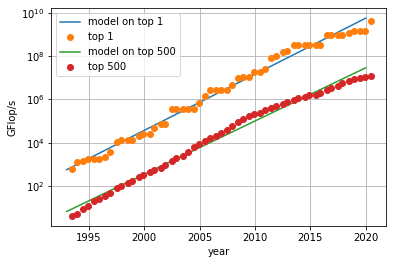

In [5]:
from sklearn.linear_model import Ridge

years = np.array((2025, ))

for number, df in dfs.items():
    X = np.array(df.loc[:, 'Year'] + df.loc[:, 'Month'] / 12)
    y = np.array(df.loc[:, 'Flops'] / 1e9)
    y = np.log(y)
    
    model = Ridge()
    model.fit(X.reshape((X.shape[0], 1)), y)
    preds = model.predict(years.reshape((years.shape[0], 1)))
    preds = np.exp(preds)
                 
    for year, pred in zip(years, preds):
        print(f'In {year} top {number} HPC will have {preds} GFlop/s.')
                 
    model_x = np.linspace(1993, 2020, 100)
    model_y = np.exp(model_x * model.coef_ + model.intercept_)
    plt.plot(model_x, model_y, label=f'model on top {number}')
    y = np.exp(y)
    plt.plot(X, y, 'o', label=f'top {number}')
    
plt.xlabel('year')
plt.ylabel('GFlop/s')
plt.yscale('log')
plt.grid(True)
plt.legend()
plt.show()